In [1]:
## for the said case we will use titanic dataset 
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()
## As we can see there are some object float int and bool values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()
## there are 177 values missing in age and deck we have 688 values missing 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df['age'].unique()
## it seems age have a continuous value and can be taken as mean for the missing data 

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [10]:
df['deck'].unique()
## there are 7 categories and a NAN value we can change NAN to some other cat and use one hot encoder 

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [11]:
df.keys()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [12]:
df[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
df['class'].unique(),df['who'].unique(),df['adult_male'].unique()

(['Third', 'First', 'Second']
 Categories (3, object): ['First', 'Second', 'Third'],
 array(['man', 'woman', 'child'], dtype=object),
 array([ True, False]))

In [16]:
encoder=LabelEncoder()
df['class']=encoder.fit_transform(df['class'])
df['who']=encoder.fit_transform(df['who'])
df['adult_male']=encoder.fit_transform(df['adult_male'])
df['sex']=encoder.fit_transform(df['sex'])
df['alive']=encoder.fit_transform(df['alive'])
df['alone']=encoder.fit_transform(df['alone'])

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,2,1,1,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,0,2,0,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,2,2,0,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,0,2,0,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,2,1,1,NaN,Southampton,no,True


In [17]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,2,1,1,NaN,Southampton,0,0
1,1,1,0,38.0,1,0,71.2833,C,0,2,0,C,Cherbourg,1,0
2,1,3,0,26.0,0,0,7.9250,S,2,2,0,NaN,Southampton,1,1
3,1,1,0,35.0,1,0,53.1000,S,0,2,0,C,Southampton,1,0
4,0,3,1,35.0,0,0,8.0500,S,2,1,1,NaN,Southampton,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    int64   
 9   who          891 non-null    int64   
 10  adult_male   891 non-null    int64   
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    int64   
 14  alone        891 non-null    int64   
dtypes: category(1), float64(2), int64(10), object(2)
memory usage: 98.8+ KB


In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,2,1,1,NaN,Southampton,0,0
1,1,1,0,38.0,1,0,71.2833,C,0,2,0,C,Cherbourg,1,0
2,1,3,0,26.0,0,0,7.9250,S,2,2,0,NaN,Southampton,1,1
3,1,1,0,35.0,1,0,53.1000,S,0,2,0,C,Southampton,1,0
4,0,3,1,35.0,0,0,8.0500,S,2,1,1,NaN,Southampton,0,1


In [20]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.338481,0.325753,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,1.000000,-0.196793,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.131900,-0.639773,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.369226,0.378685,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.083081,-0.136003,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.018443,-0.055682,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.549500,0.146290,-0.182024,0.257307,-0.271832
class,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,1.000000,-0.196793,0.094035,-0.338481,0.135207
who,0.325753,-0.196793,-0.639773,0.378685,-0.136003,-0.055682,0.146290,-0.196793,1.000000,-0.437532,0.325753,0.006540
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,0.094035,-0.437532,1.000000,-0.557080,0.404744


In [24]:
def corr_rel(dataset,threshold):
    col_corr=set()
    col_matrix=dataset.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if abs(col_matrix.iloc[i,j]) > threshold:
                colname=col_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
                   

In [26]:
corr_rel(df,0.85)
## It seems adult_male,alive and class are correlated and can be dropped 

{'adult_male', 'alive', 'class'}

In [27]:
df=df.drop('adult_male',axis=1)

In [29]:
df=df.drop('alive',axis=1)
df=df.drop('class',axis=1)

In [30]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,1,NaN,Southampton,0
1,1,1,0,38.0,1,0,71.2833,C,2,C,Cherbourg,0
2,1,3,0,26.0,0,0,7.9250,S,2,NaN,Southampton,1
3,1,1,0,35.0,1,0,53.1000,S,2,C,Southampton,0
4,0,3,1,35.0,0,0,8.0500,S,1,NaN,Southampton,1


In [31]:
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare,who,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.325753,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.196793,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.639773,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.378685,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.136003,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.055682,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.146290,-0.271832
who,0.325753,-0.196793,-0.639773,0.378685,-0.136003,-0.055682,0.146290,1.000000,0.006540
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.006540,1.000000


<AxesSubplot: >

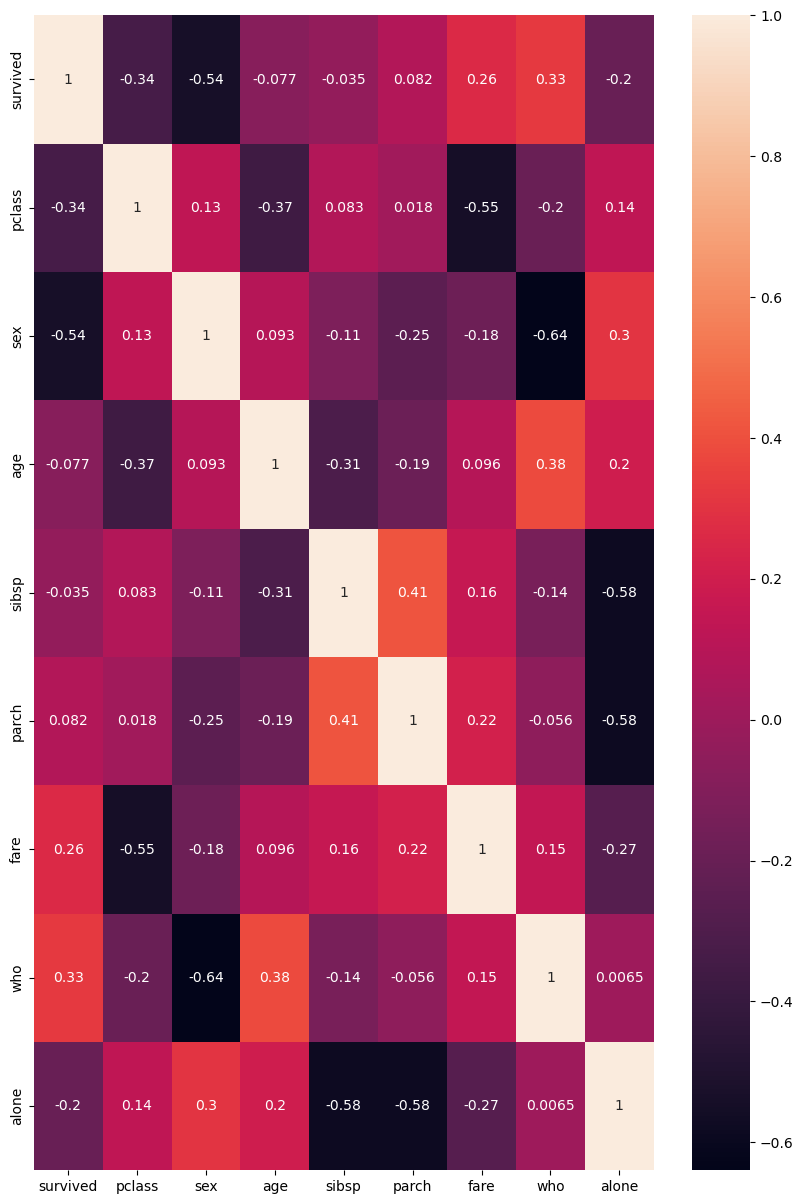

In [32]:
plt.figure(figsize=(10,15))
sns.heatmap(data=df.corr(),annot=True)

In [33]:
## Now we will automate the pipleline for scaling and ,missing values
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,1,NaN,Southampton,0
1,1,1,0,38.0,1,0,71.2833,C,2,C,Cherbourg,0
2,1,3,0,26.0,0,0,7.9250,S,2,NaN,Southampton,1
3,1,1,0,35.0,1,0,53.1000,S,2,C,Southampton,0
4,0,3,1,35.0,0,0,8.0500,S,1,NaN,Southampton,1


In [39]:
X=df.drop(labels=['fare','sibsp','parch','embarked','deck','embark_town'],axis=1)
y=df['fare']

In [40]:
X

,survived,pclass,sex,age,who,alone
0,0,3,1,22.0,1,0
1,1,1,0,38.0,2,0
2,1,3,0,26.0,2,1
3,1,1,0,35.0,2,0
4,0,3,1,35.0,1,1
...,...,...,...,...,...,...
886,0,2,1,27.0,1,1
887,1,1,0,19.0,2,1
888,0,3,0,NaN,2,0
889,1,1,1,26.0,1,1


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [43]:
from sklearn.impute import SimpleImputer ## handling missing values
from sklearn.preprocessing import OneHotEncoder ## handling categorical features
## handle outliers 
from sklearn.preprocessing import StandardScaler ## feture scaling 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [46]:
num_cols=['age']
cat_cols=['survived','pclass','sex','alone','who']

In [45]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='mean')),
        ('Scaler',StandardScaler())
    ]
)

cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehotencoder',OneHotEncoder())
    ]
)

In [47]:
processor=ColumnTransformer([
    ('num_pipeline',num_cols,num_pipeline),
    ('cat_pipeline',cat_cols,cat_pipeline)
    
])

In [50]:
X_train=processor.fit_transform(X_train)

TypeError: All estimators should implement fit and transform, or can be 'drop' or 'passthrough' specifiers. '['age']' (type <class 'list'>) doesn't.